In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D 
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import MaxPooling1D
from numpy import zeros
from sklearn.model_selection import KFold
from tensorflow.keras.metrics import Recall, Precision, MeanSquaredError

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
reviews_cleaned = "/content/drive/MyDrive/NLP_FINAL/data/cleanedDataset.csv"
dataset = pd.read_csv(reviews_cleaned)

In [ ]:
y = dataset["sentiment"].values
X = dataset["text"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

In [ ]:


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

sequences_length = 50
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_train = pad_sequences(sequences_train, maxlen=sequences_length)

sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_test = pad_sequences(sequences_test, maxlen=sequences_length)
vocabulary_size = len(tokenizer.word_index) +1

In [ ]:
folds = 4
kfold = KFold(n_splits=folds, shuffle=True)

s = []

for train, test in kfold.split(X_train, y_train):
  embedding_dim = 16
  lstm_units = 32

  model = Sequential()
  model.add(Embedding(vocabulary_size, 16, input_length=sequences_length))
  model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall(), Precision(), MeanSquaredError()])

  model.fit(sequences_train[train], y_train[train], epochs = 3, batch_size=10, verbose = 1)

  scores = model.evaluate(sequences_train[test], y_train[test], verbose=1)
  print("\n\n")
  print(model.metrics_names)
  print(scores)

  s.append(scores)

Epoch 1/3
3435/3435 [==============================] - 67s 19ms/step - loss: 0.3611 - accuracy: 0.8339 - recall: 0.9192 - precision: 0.8613 - mean_squared_error: 0.1152
Epoch 2/3
3435/3435 [==============================] - 63s 18ms/step - loss: 0.2554 - accuracy: 0.8923 - recall: 0.9379 - precision: 0.9158 - mean_squared_error: 0.0781
Epoch 3/3
358/358 [==============================] - 2s 3ms/step - loss: 0.3854 - accuracy: 0.8548 - recall: 0.9404 - precision: 0.8706 - mean_squared_error: 0.1102



['loss', 'accuracy', 'recall', 'precision', 'mean_squared_error']
[0.3853519558906555, 0.8548218011856079, 0.9403647780418396, 0.8705843091011047, 0.11020379513502121]
Epoch 1/3
3435/3435 [==============================] - 61s 18ms/step - loss: 0.3623 - accuracy: 0.8356 - recall_1: 0.9178 - precision_1: 0.8646 - mean_squared_error: 0.1152
Epoch 2/3
3435/3435 [==============================] - 58s 17ms/step - loss: 0.2549 - accuracy: 0.8929 - recall_1: 0.9384 - precision_1: 0.9165 - mean_sq

In [ ]:
import numpy as np
print(np.mean([i[1] for i in s]))
#e1 0.8603656142950058
#e3 0.8473716974258423
print(max([i[1] for i in s]))

0.8473716974258423
0.8548218011856079


In [ ]:
print("Recall", np.mean([i[2] for i in s]))

Recall 0.9103672206401825


In [ ]:
print("precision_3", np.mean([i[3] for i in s]))

precision_3 0.8834921419620514


In [ ]:
model.evaluate(sequences_test, y_test, verbose=1)

358/358 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8483 - recall_3: 0.8980 - precision_3: 0.8942 - mean_squared_error: 0.1126


[0.3775877356529236,
 0.8482704162597656,
 0.8979616165161133,
 0.8942089676856995,
 0.11255286633968353]

In [ ]:
#train a CNN model
model = Sequential()
model.add(Embedding(vocabulary_size, 16, input_length=sequences_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

#CNNv2
# model = Sequential()
# embedding_layer = Embedding(vocabulary_size, 16, input_length=sequences_length)
# model.add(embedding_layer)

# model.add(Conv1D(32, 4, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()



#CNNv3
# model = Sequential()
# embedding_layer = Embedding(vocabulary_size, 128, input_length=sequences_length)
# model.add(embedding_layer)

# model.add(Conv1D(128, 16, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()


In [ ]:
# model.fit(sequences_train, y_train, epochs = 100, batch_size=32, verbose = 1)
history = model.fit(sequences_train, y_train, batch_size=10, epochs=3, verbose=1, validation_split=0.1)


In [ ]:
loss, accuracy = model.evaluate(sequences_test, y_test, verbose=1)


print('Test Accuracy: %f' % (accuracy*100)) 



#------------------------------
# Results CNN
# epochs 5 ---->> Test Accuracy: 83.377010
# epochs 20 ---->> Test Accuracy: 81.892031
# epochs 100 ---->> Test Accuracy: 83.027601

# Results CNNv2
# epochs 5 ---->> Test Accuracy: 81.376660
# epochs 30 ---->> Test Accuracy: 82.424879

# Results CNNv3
# epochs 3 ---->> Test Accuracy: 85.211390
# epochs 3 ---->> Test Accuracy: 85.124040
# epochs 5 ---->> Test Accuracy: 84.119499





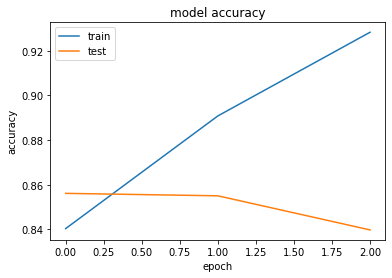

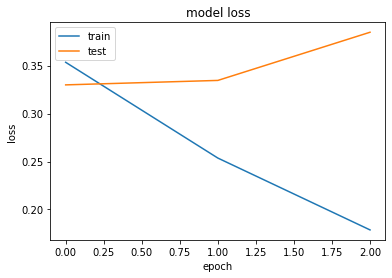

In [ ]:
# plot the loss and accuracy difference between the training and test set.
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()




